# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
# this is a comment
%matplotlib inline  
pd.set_option('display.expand_frame_repr', False) #prevents multiple lines of pandas data frames

**Question 1**: What are we accomplishing with `as` reserved word?

Using the keyword "`as`" we are basically assigning pandas to the word pd and np to the word np. Then we can refer to pandas and numpy by using the assgined words.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [3]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Origin
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130    3504          12.0     70     US
1          Buick Skylark 320  15.0          8         350.0         165    3693          11.5     70     US
2         Plymouth Satellite  18.0          8         318.0         150    3436          11.0     70     US
3              AMC Rebel SST  16.0          8         304.0         150    3433          12.0     70     US
4                Ford Torino  17.0          8         302.0         140    3449          10.5     70     US


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

**Answer 2** To show the first 10 rows using `head` we can use `>print (df.head(10))`. This will print out index 0-9. The type of each column is a specific attribute about the cars listed in the csv file, such as displacememt, MPG, etc. 

In [4]:
print("\n{}".format(df.dtypes))


Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object


There are different ways of exploring and indexing the table. Here are some examples.

In [5]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.ix[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Origin
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130    3504          12.0     70     US
1          Buick Skylark 320  15.0          8         350.0         165    3693          11.5     70     US
2         Plymouth Satellite  18.0          8         318.0         150    3436          11.0     70     US
3              AMC Rebel SST  16.0          8         304.0         150    3433          12.0     70     US
4                Ford Torino  17.0          8         302.0         140    3449          10.5     70     US
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  17.0
5           Ford Galaxie 500  15.0
6   

AttributeError: 'DataFrame' object has no attribute 'ix'

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders. 

In [6]:
print (df.tail())
print ("======================================================================================================")
print (df[-5:])
print ("======================================================================================================")
print (df[df['Cylinders'] == 3])

                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model  Origin
401    Ford Mustang GL  27.0          4         140.0          86    2790          15.6     82      US
402  Volkswagen Pickup  44.0          4          97.0          52    2130          24.6     82  Europe
403      Dodge Rampage  32.0          4         135.0          84    2295          11.6     82      US
404        Ford Ranger  28.0          4         120.0          79    2625          18.6     82      US
405         Chevy S-10  31.0          4         119.0          82    2720          19.4     82      US
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model  Origin
401    Ford Mustang GL  27.0          4         140.0          86    2790          15.6     82      US
402  Volkswagen Pickup  44.0          4          97.0          52    2130          24.6     82  Europe
403      Dodge Rampage  32.0          4         135.0          84    2295

Now, we are ready to start plotting the data.

OSError: [Errno 9] Bad file descriptor

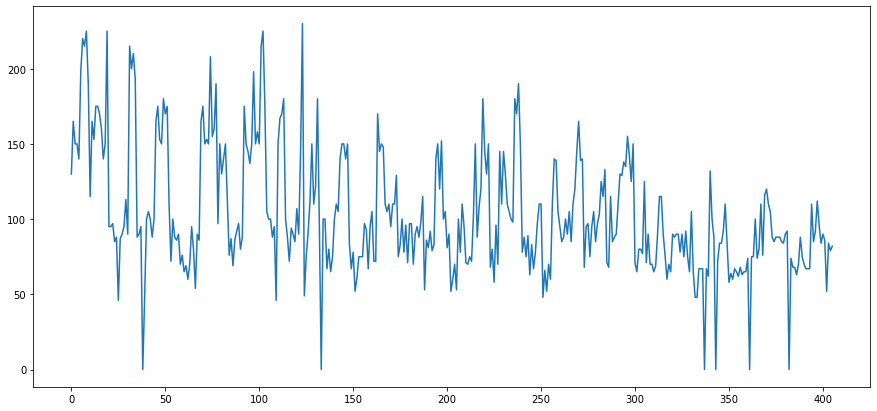

In [7]:
plt.figure(figsize=(15,7))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute
dfUS = (df[df['Origin'] == 'US'])
dfUS.to_csv("dfUS.csv", encoding='utf-8', index=False)
dfUSPlot = pd.read_csv('dfUS.csv')

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

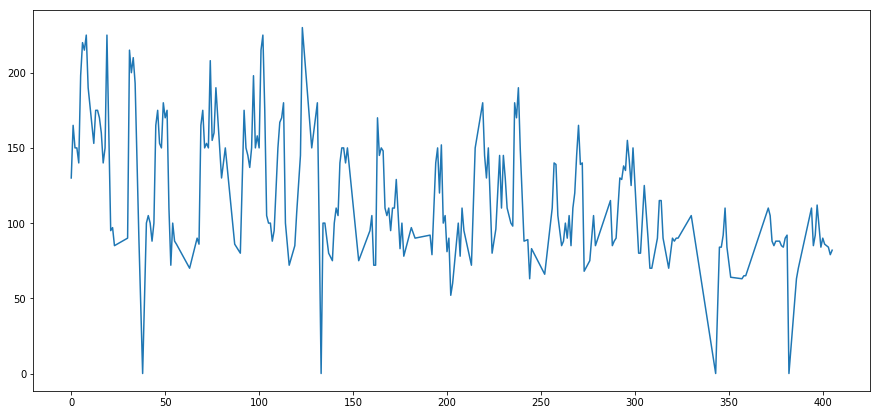

In [74]:
plt.figure(figsize=(15,7)) #plot size
plt.plot(df[df['Origin'] == 'US']['Horsepower'])

To plot the histogram of a selected attribute:

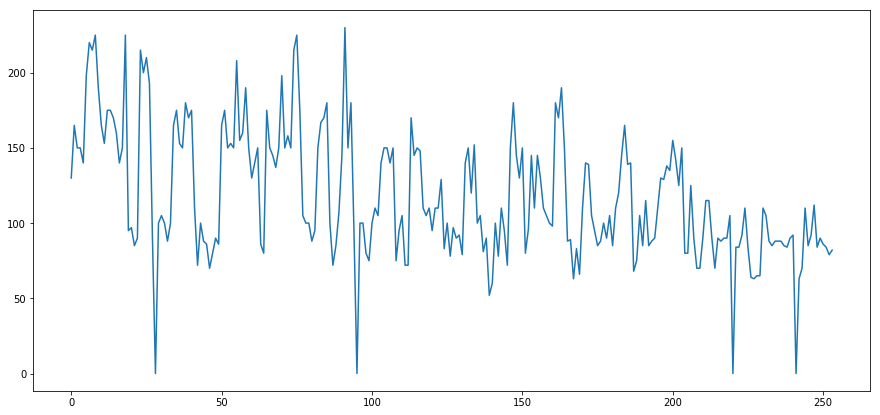

In [76]:
plt.figure(figsize=(15,7)) #plot size
plt.plot(dfUSPlot['Horsepower']) #This is the plot using a separate csv file by extracting all the data with Origin='US'

(array([  4.,   0., 207.,   0.,   3.,   0.,  84.,   0.,   0., 108.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

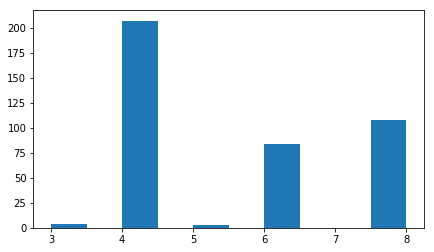

In [88]:
fig = plt.figure(figsize=(7,4))
#plt.hist(df['MPG'], bins=20);   # ; suppresses Out
plt.hist(df['Cylinders'], bins=10) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

**Answer 5**: In the histogram above the x-axis represent the MPG and the y-axis represents the frequency of the MPG as found in the dataset. Based on the distribution of the histogram we can conlude that most cars are in the 12-32 MPG. 
For MPG I think that leaving `bins=20` is actually a good representation of the data. Since MPG does have so many variation leaving it at 20 doesn't lose too much data.
For Cylinders, since the max cylinder number is 8 and the minimum is 3 and all of them are integers, we can set `bins=10` and just have 5 bars showing all the data.

The following code provides statistics for number of cylinders.

In [77]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

Horizontal bar plot:

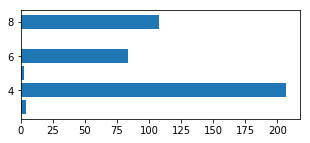

In [89]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"]);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

In [92]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"]);

TypeError: __init__() got an unexpected keyword argument 'width'

Pie chart:

In [ ]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

In [ ]:
df.boxplot(column='MPG',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

Scatterplot between MPG and Weight attributes:

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.